<h1 align="center">Wrapping and Deploying Legacy Astronomical Code Into Python Environments: An applied Case Study
</h1>
<h2 align="center"> `PyCupid` Demo for ADASS 2017, Santiago-Chile.</h2> 

_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - LIRAE/UTFSM - October 2017._

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

# just for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# Installing `PyCupid` is as easy as

In [5]:
%%bash
pip install pycupid

  Using cached pycupid-0.1.4-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


# We load an `Orion-KL` FITS from ALMA SV with `astropy`

In [2]:
from astropy.io import fits

hdulist = fits.open('FITS/ALMA00000034.fits')
hdulist.info()
print('\nTarget Object: '+hdulist[0].header['OBJECT'])

Filename: FITS/ALMA00000034.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     731   (100, 100, 1, 1)   float32   

Target Object: Orion KL


In [3]:
orion = hdulist[0]
tmp = orion.copy()
orion.header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   5.160116155942E-04                                                  
BMIN    =   3.801464703348E-04                                                  
BPA     =   1.758169860840E+02                                                  
BTYPE   = 'Intensity'       

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.677e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.093e+00 [aplpy.core]


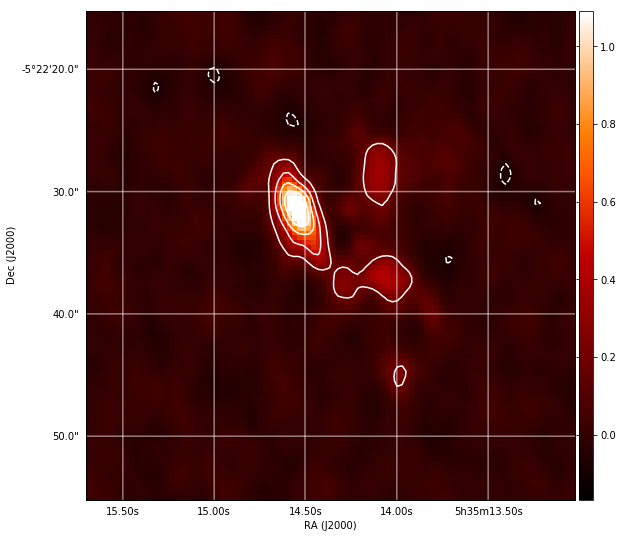

In [4]:
import aplpy

fig = aplpy.FITSFigure(orion)
fig.show_colorscale(cmap='gist_heat')
fig.add_colorbar()
fig.show_grid()
fig.show_contour(colors='white')

# Let's import `PyCupid` for doing some serious data science

In [5]:
# CUPID Clumping algorithms
from pycupid import clumpfind, fellwalker, gaussclumps, reinhold

from ipywidgets import interact, fixed, IntSlider, FloatSlider

In [6]:
# data as a NumPy array (Don't run this twice)
data = orion.data.sum(axis=(0,1))
data = np.flip(data,0)

In [7]:
def run_cupid(data, algorithm=fellwalker, rms=0.1, config=None):
    # CUPID clumping algorithm
    out = algorithm(data, rms, config)
    out[out==out.min()] = 0.
    # Plotting the result with APLpy
    fig = mpl.figure(figsize=(15, 7))
    # fig1
    fig1 = aplpy.FITSFigure(orion, figure=fig, subplot=[0.1,0.1,0.35,0.8], auto_refresh=True)
    fig1.show_colorscale(cmap='gist_heat')
    fig1.show_grid()
    fig1.show_contour(colors='white')
    # fig2
    tmp.data[0,0,:,:] = np.flip(out.T, 0)
    fig2 = aplpy.FITSFigure(tmp, figure=fig, subplot=[0.53,0.1,0.35,0.8], auto_refresh=True)
    fig2.show_colorscale(cmap='magma')
    fig2.show_grid()
    fig.canvas.draw()
    mpl.show()

# Inspecting the algorithms interactively

In [8]:
algorithms = {'gaussclumps':gaussclumps, 'clumpfind':clumpfind,
              'fellwalker':fellwalker, 'reinhold':reinhold}

interact(run_cupid,
         data = fixed(data),
         algorithm = algorithms,
         rms = FloatSlider(min=data.min(), max=data.max()*0.2, step=0.01, value=0.05),
         config = fixed(None)
        );

A Jupyter Widget

# Deep inside into fellwalker

In [9]:
def run_fellwalker(data, RMS=0.05, CLEANITER=None, FLATSLOPE=None, MAXBAD=None, MINDIP=None, 
                   MINHEIGHT=None, MINPIX=None, MAXJUMP=None):
    # CUPID clumping algorithm
    config = dict()
    if CLEANITER is not None: config['CLEANITER']=CLEANITER
    if FLATSLOPE is not None: config['FLATSLOPE']=FLATSLOPE
    if MAXBAD is not None: config['MAXBAD']=MAXBAD
    if MINDIP is not None: config['MINDIP']=MINDIP
    if MINHEIGHT is not None: config['MINHEIFHT']=MINHEIGHT
    if MINPIX is not None: config['MINPIX']=MINPIX
    if MAXJUMP is not None: config['MAXJUMP']=MAXJUMP
    out = fellwalker(data, RMS, config)
    out[out==out.min()] = 0.
    # Plotting the result with APLpy
    fig = mpl.figure(figsize=(15, 7))
    # fig1
    fig1 = aplpy.FITSFigure(orion, figure=fig, subplot=[0.1,0.1,0.35,0.8], auto_refresh=True)
    fig1.show_colorscale(cmap='gist_heat')
    fig1.show_grid()
    fig1.show_contour(colors='white')
    # fig2
    tmp.data[0,0,:,:] = np.flip(out.T, 0)
    fig2 = aplpy.FITSFigure(tmp, figure=fig, subplot=[0.53,0.1,0.35,0.8], auto_refresh=True)
    fig2.show_colorscale(cmap='magma')
    fig2.show_grid()
    fig.canvas.draw()
    mpl.show()

In [11]:
interact(run_fellwalker,
         data = fixed(data),
         RMS = FloatSlider(min=data.min(), max=data.max()*0.2, step=0.01, value=0.05),
         CLEANITER = IntSlider(min=1, max=10, step=1, value=1),
         FLATSLOPE = FloatSlider(min=0, max=data.max()*0.25, step=0.01, value=0.05),
         MAXBAD = FloatSlider(min=0., max=1., step=0.01, value=0.05),
         MINDIP = FloatSlider(min=0., max=data.max()*0.25, step=0.01, value=0.05),
         MINHEIGHT = FloatSlider(min=0., max=data.max()*0.25, step=0.01, value=0.05),
         MINPIX = IntSlider(min=0, max=20, step=1, value=7),
         MAXJUMP = IntSlider(min=1, max=10, step=1, value=4)
        );

A Jupyter Widget